# Title: Mt Whitney Location on a California Map
Author: Carly Caswell

Repository: https://github.com/ccaswell25/eds220-hwk4


## About

### Purpose
This is a simple map showing the location of the LULC tile section relative to the state of California and Mount Whitney. 

### Highlights

-Geospatial data wrangling with geopandas

-Merging of tabular and vector data

-Creating and customizing a map of California


## About the Data

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)


## Final Output
The final visualization for this notebook is located below:

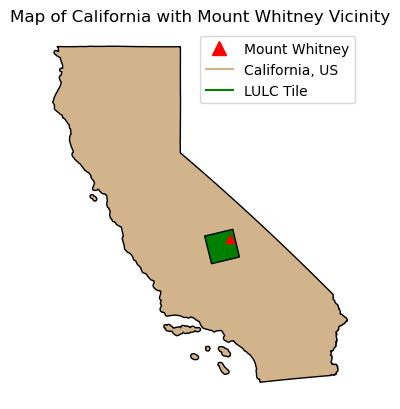

In [25]:
### ===== FINAL CODE =====
# import libraries and functions here
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr
from shapely.geometry import Polygon 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point
from shapely.geometry import box
import matplotlib.lines as mlines

# Importing the raster file
lulc = os.path.join(os.getcwd(), 'data', 'land_cover.tif') #data from canvas week 7
lulc = rioxr.open_rasterio(lulc)

# Importing the CA shapefile
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

#Creating a lulc bounding box:
bbox_geometry = lulc.rio.bounds()
bbox = gpd.GeoDataFrame(geometry = [box(*bbox_geometry) ], crs = lulc.rio.crs)

# Creating a geopandas.GeoDataFrame of the mt_whitney coordinates
coords = (-118.2598, 36.5593) #y,x
mt_whitney = gpd.GeoDataFrame(geometry =[Point(coords)], crs = 'epsg:4326') #using the lulc crs

#dropping extra dimension:
lulc = lulc.squeeze()
#dropping extra coordinates:
lulc = lulc.drop('band')

#updating all crs to be the same:
ca = ca.to_crs(4326)
bbox = bbox.to_crs(4326)

# Plot the shapefile
fig, ax = plt.subplots()
ca.plot(ax=ax, color='tan', edgecolor='black')

# Plot the raster file
bbox.plot(ax=ax, facecolor ='green', edgecolor = "black", linewidth = 1)

# Plot Mount Whitney
mt_whitney.plot(ax=ax, color='red', marker='^', label='Mount Whitney')

# Set plot title
plt.title('Map of California with Mount Whitney Vicinity')

# Set legend with linestyle='None'
legend_elements = [mlines.Line2D([0], [0], color='red', marker='^', linestyle='None', markersize=10, label='Mount Whitney'),
                   mlines.Line2D([0], [0], color='tan', label='California, US'), 
                   mlines.Line2D([0], [0], color='green', label='LULC Tile')]
# Add legend
ax.legend(handles=legend_elements)

# Remove the axes
plt.axis('off')

# Show the plot
plt.show()

## Import libraries and functions

In [7]:
# import libraries and functions here
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
import xarray as xr
from shapely.geometry import Polygon 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from shapely.geometry import Point
from shapely.geometry import box
import matplotlib.lines as mlines


## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [8]:
# Importing the raster file
lulc = os.path.join(os.getcwd(), 'data', 'land_cover.tif') #data from canvas week 7
lulc = rioxr.open_rasterio(lulc)
lulc.head() #taking a look at the data
#I notice there is an extra band dimension. We'll take care of that later

<xarray.DataArray (band: 1, y: 5, x: 5)>
array([[[42, 42, 42, 42, 42],
        [39, 42, 42, 39, 42],
        [39, 39, 39, 39, 42],
        [39, 42, 42, 39, 39],
        [39, 39, 39, 39, 39]]], dtype=uint16)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -2.031e+06 -2.031e+06
  * y            (y) float64 1.762e+06 1.762e+06 1.762e+06 1.762e+06 1.762e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        ERDAS IMAGINE
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

<AxesSubplot:>

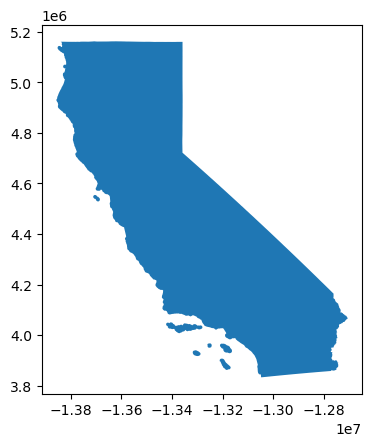

In [9]:
# Importing the CA shapefile
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')
ca.head() #taking a look at the ca data
ca.plot()

## Bounding box
Create a `geopandas.GeoDataFrame` named `bbox` with the lulc bounding box. 

<AxesSubplot:>

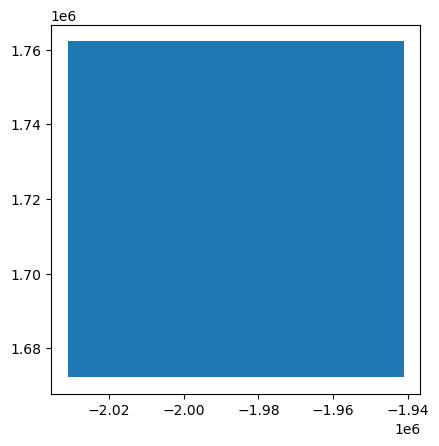

In [10]:
#Creating a lulc bounding box:
bbox_geometry = lulc.rio.bounds()
bbox = gpd.GeoDataFrame(geometry = [box(*bbox_geometry) ], crs = lulc.rio.crs)
bbox.plot()

## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [17]:
# Creating a geopandas.GeoDataFrame of the mt_whitney coordinates
coords = (-118.2598, 36.5593) #y,x
mt_whitney = gpd.GeoDataFrame(geometry =[Point(coords)], crs = 'epsg:4326')
print(mt_whitney) #checking the data

                      geometry
0  POINT (-118.25980 36.55930)


## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [12]:
# Checking the dimensions 
print('dims:', lulc.dims)

#dropping dimension:
lulc = lulc.squeeze()
print(lulc.dims, '\n', lulc.coords, '\n') #\n is to skip a line when printing

#in the above we've dropped the dimension but still have the coordinates
#dropping coordinates:

lulc = lulc.drop('band')
print(lulc.dims, '\n', lulc.coords, '\n')

dims: ('band', 'y', 'x')
('y', 'x') 
 Coordinates:
    band         int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0 

('y', 'x') 
 Coordinates:
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0 



In [13]:
lulc.head() 
#Nice, I can see the band is now gone

<xarray.DataArray (y: 5, x: 5)>
array([[42, 42, 42, 42, 42],
       [39, 42, 42, 39, 42],
       [39, 39, 39, 39, 42],
       [39, 42, 42, 39, 39],
       [39, 39, 39, 39, 39]], dtype=uint16)
Coordinates:
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -2.031e+06 -2.031e+06
  * y            (y) float64 1.762e+06 1.762e+06 1.762e+06 1.762e+06 1.762e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        ERDAS IMAGINE
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [19]:
#Updating the crs's to make sure they're the same as mt_whitney
print(mt_whitney.crs)
ca = ca.to_crs(4326)
bbox = bbox.to_crs(4326)
print(bbox.crs)
print(ca.crs)
#the CRS's are the same

epsg:4326
EPSG:4326
EPSG:4326


## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

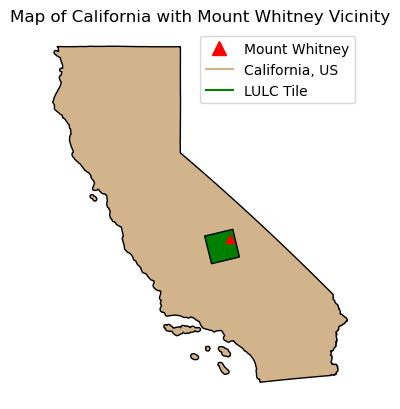

In [20]:
 # Plot the shapefile
fig, ax = plt.subplots()
ca.plot(ax=ax, color='tan', edgecolor='black')

# Plot the raster file
bbox.plot(ax=ax, facecolor ='green', edgecolor = "black", linewidth = 1)

# Plot Mount Whitney
mt_whitney.plot(ax=ax, color='red', marker='^', label='Mount Whitney')

# Set plot title
plt.title('Map of California with Mount Whitney Vicinity')

# Set legend with linestyle='None'
legend_elements = [mlines.Line2D([0], [0], color='red', marker='^', linestyle='None', markersize=10, label='Mount Whitney'),
                   mlines.Line2D([0], [0], color='tan', label='California, US'), 
                   mlines.Line2D([0], [0], color='green', label='LULC Tile')]

# Add legend
ax.legend(handles=legend_elements)

# Remove the axes
plt.axis('off')

# Show the plot
plt.show()

## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
